# Benchmark: Comparison with analytic solution for unconfined flow

Consider flow to a pumping well in an unconfined aquifer. The drawdown vs. time curves will show the effect of the delayed response of the water table. Neuman (1972) published a transient three-dimensional well solution for the case that the aquifer thickness may be approximated as constant, which is reasonable when the drawdown is small compared to the saturated thickness. Phreatic storage is taken into account through the boundary condition at the top of the aquifer. The same problem may be solved with TTim. An unconfined aquifer is divided into ten model layers of 1 meter thickness and with elastic storage. A thin eleventh layer is added on top of the aquifer and has phreatic storage. The values are summarized in the table below. One well is screened in layers 1 through 10. As the `DischargeWell` element is used, the discharge is specified for each layer to be 1 m$^3$/d for a total of 10 m$^3$/d. This facilitates comparison with the solution of Neuman, who specified a uniform inflow along the well face. (In reality it would be better to use a `Well` element, where the head is uniform along the well screen and the inflow varies.) The effect of the delayed response of the water table is clearly visible in the figure below, but it is noted that this effect is much less pronounced when the curves are plotted on a linear scale rather than a log scale. 

## Aquifer data 

| Layer  | k$_\text{aq}$ (m/day) | thickness (m) | Saq ($\sigma = 0.1$) |Saq ($\sigma=0.01$) | Saq ($\sigma=0.001$) |
| --- | ---: | ---: | ---: |---: | ---: |
| 0 | 1 | 0.01 | 0.1 | 0.1 | 0.1 |
| 1-10 | 1 | 1 | 10$^{-3}$ m$^{-1}$ | 10$^{-4}$ m$^{-1}$ | 10$^{-5}$ m$^{-1}$ |

A comparison is made to Fig. 2 in Neuman (1972). This graph shows dimensionless drawdown vs. dimensionless time, both on a log scale, at the bottom of the aquifer at a distance of one aquifer thickness from the well for an isotropic aquifer. The curves represent different values of $\sigma$, defined as the ratio of the total elastic storage of the aquifer divided by the phreatic storage. The same problem is solved with TTim for the same five values of $\sigma$. The crosses in the figure represent the drawdown computed with TTim in the bottom layer of the model. This test validates the accuracy of TTim for modeling quasi three-dimensional flow using Model3D in combination with phreatic storage and a `DischargeWell` element screened in multiple aquifer layers.

**Reference**

S.P. Neuman, 1972, Theory of flow in unconfined aquifers considering delayed response of the water table. Water Resources Research 8(4), 1031-1045.

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

import ttim

sigma equals: 0.09999999999999999
sigma equals: 0.01
sigma equals: 0.001
sigma equals: 9.999999999999999e-05
sigma equals: 9.999999999999999e-06


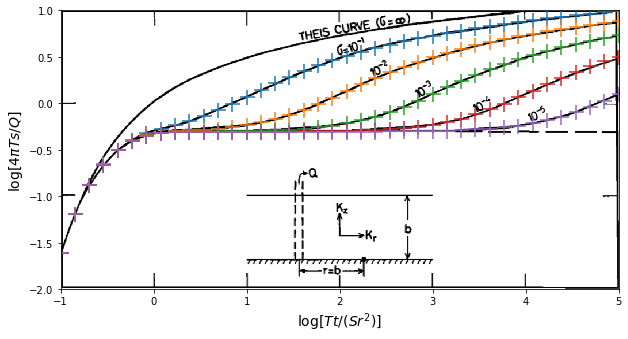

In [2]:
plt.figure(figsize=(10, 6))
img = mpimg.imread("figs/neuman.png")
plt.imshow(np.flipud(img), origin="lower", extent=(-1, 5, -2, 1))

kaq = np.ones(11)
z = np.hstack((10.01, np.arange(10, -1, -1)))
S = 0.1 * np.ones(11)
T = 10

for Ss in [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]:
    # for Ss in [1e-3]:
    S[1:] = Ss
    Stot = 10 * Ss
    sig = Stot / S[0]
    print("sigma equals:", sig)
    ts = np.logspace(-1, 5, 40)
    t = ts * Stot * 10**2 / T
    #
    ml = ttim.Model3D(kaq, z, S, kzoverkh=1, phreatictop=True, tmin=t[0], tmax=t[-1])
    w = ttim.DischargeWell(
        ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 1)], layers=np.arange(1, 11)
    )
    ml.solve(silent=True)
    h = ml.head(10, 0, t)
    d = -h * 4 * np.pi * T / 10
    plt.plot(np.log10(ts), np.log10(d[-1]), "+", markersize=15, mew=1.5)

plt.xlabel("$\log[Tt/(Sr^2)]$", fontsize=14)
plt.ylabel("$\log[4\pi Ts/Q]$", fontsize=14)

## Uniform head rather than uniform inflow
The solution is repeated for the case that the inflow along the wellbore is not uniform, but the head along the wellbore is uniform and the total discharge is equal to the specified discharge. The only change is that the `DischargeWell` element is replaced by a `Well` element.

sigma equals: 0.09999999999999999
sigma equals: 0.01
sigma equals: 0.001
sigma equals: 9.999999999999999e-05
sigma equals: 9.999999999999999e-06


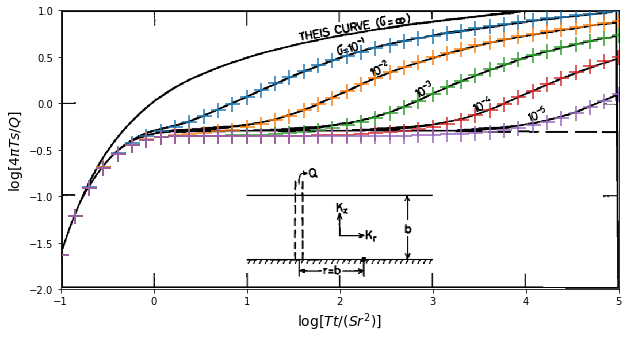

In [3]:
plt.figure(figsize=(10, 6))
img = mpimg.imread("figs/neuman.png")
plt.imshow(np.flipud(img), origin="lower", extent=(-1, 5, -2, 1))

kaq = np.ones(11)
z = np.hstack((10.01, np.arange(10, -1, -1)))
S = 0.1 * np.ones(11)
T = 10

for Ss in [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]:
    # for Ss in [1e-3]:
    S[1:] = Ss
    Stot = 10 * Ss
    sig = Stot / S[0]
    print("sigma equals:", sig)
    ts = np.logspace(-1, 5, 40)
    t = ts * Stot * 10**2 / T
    #
    ml = ttim.Model3D(kaq, z, S, kzoverkh=1, phreatictop=True, tmin=t[0], tmax=t[-1])
    w = ttim.Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 10)], layers=np.arange(1, 11))
    ml.solve(silent=True)
    h = ml.head(10, 0, t)
    d = -h * 4 * np.pi * T / 10
    plt.plot(np.log10(ts), np.log10(d[-1]), "+", markersize=15, mew=1.5)

plt.xlabel("$\log[Tt/(Sr^2)]$", fontsize=14)
plt.ylabel("$\log[4\pi Ts/Q]$", fontsize=14)